# Inference Question:
In this competition you are asked to predict the forest cover type (the predominant kind of tree cover) from strictly cartographic variables (as opposed to remotely sensed data). 

In [1]:
import pandas as pd 
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import warnings
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from sklearn.ensemble import  GradientBoostingClassifier
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC, LinearSVC 
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB
from matplotlib.colors import ListedColormap
from sklearn import preprocessing

from sklearn import tree

from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import json
import pickle
from IPython.display import Image

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

k_folds = 5
%matplotlib inline

In [2]:
train = pd.read_csv("/Users/Stephen/Desktop/207/mids-w207_9_sp22_forest_cover_classification/data/train.csv", index_col = 0)
test = pd.read_csv("/Users/Stephen/Desktop/207/mids-w207_9_sp22_forest_cover_classification/data/test.csv", index_col = 0)

In [3]:
print("Train data shape: %s" % str(train.shape))

Train data shape: (15120, 55)


In [4]:
print("Test data shape: %s" % str(test.shape))

Test data shape: (565892, 54)


In [5]:
train.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
3,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
4,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
5,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [6]:
X = np.array(train)
Y = np.array(train["Cover_Type"].tolist())

In [7]:
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[13000:], Y[13000:]
dev_data, dev_labels = X[12000:13000], Y[12000:13000]
train_data, train_labels = X[:12000], Y[:12000]
train_df = train.iloc[shuffle,:].iloc[:12000 , :]

data shape:  (15120, 55)
label shape: (15120,)


# EDA

In [8]:
display(train_df.describe())

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,12000.000000,12000.000000,12000.00000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.0,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.0,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.00000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,2748.597583,156.340167,16.49650,228.423667,51.145167,1712.584000,212.557750,218.904667,135.195833,1511.753750,0.238167,0.032167,0.419000,0.310667,0.023583,0.040750,0.063833,0.056500,0.010833,0.042833,0.0,0.000083,0.000750,0.141750,0.026417,0.015417,0.031583,0.011000,0.0,0.007750,0.040500,0.004083,0.002917,0.009250,0.001167,0.023750,0.050500,0.017000,0.000083,0.00350,0.001000,0.000500,0.083500,0.048333,0.022083,0.046000,0.040333,0.001667,0.006167,0.000667,0.002083,0.048000,0.042750,0.031083,4.002333
std,417.675096,110.213665,8.49124,210.899005,61.007876,1328.436931,30.649667,22.907684,45.789240,1103.505424,0.425979,0.176450,0.493416,0.462786,0.151753,0.197719,0.244466,0.230894,0.103522,0.202490,0.0,0.009129,0.027377,0.348808,0.160378,0.123208,0.174895,0.104307,0.0,0.087696,0.197137,0.063773,0.053930,0.095735,0.034138,0.152276,0.218983,0.129276,0.009129,0.05906,0.031608,0.022356,0.276648,0.214479,0.146961,0.209494,0.196748,0.040792,0.078289,0.025812,0.045598,0.213775,0.202301,0.173550,1.998790
min,1874.000000,0.000000,0.00000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2374.000000,64.000000,10.00000,67.000000,5.000000,759.000000,196.000000,207.000000,107.000000,732.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,2750.000000,125.000000,15.00000,180.000000,32.000000,1307.000000,220.000000,223.000000,138.000000,1256.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,3099.000000,260.000000

In [9]:
train_df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
14757,3418,59,1,256,8,1008,220,235,152,953,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,7
5874,2471,53,14,134,28,228,227,210,113,1829,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
11370,2837,358,7,234,85,3486,209,227,156,5999,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
13129,2251,359,12,0,0,1622,202,218,153,984,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
5985,2445,111,21,95,23,730,250,213,81,277,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3


In [10]:
def count_zero_for_a_column(train_df, column_name):
    count_obj = train_df.apply(lambda x: True if x[column_name] == 0 else False , axis=1)
    no_rows = len(count_obj[count_obj == True].index)
    print ( column_name , ' : ' , no_rows )
print ("\033[1m" , 'Count of zero rows by column :' , "\033[0;0m")
column_list = ['Elevation', 'Aspect', 'Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm','Horizontal_Distance_To_Fire_Points']
for column_name in column_list:
    count_zero_for_a_column(train_df, column_name)

 Count of zero rows by column : 
Elevation  :  0
Aspect  :  86
Slope  :  2
Horizontal_Distance_To_Hydrology  :  1277
Vertical_Distance_To_Hydrology  :  1507
Horizontal_Distance_To_Roadways  :  2
Hillshade_9am  :  1
Hillshade_Noon  :  0
Hillshade_3pm  :  73
Horizontal_Distance_To_Fire_Points  :  1


# Model Testing

## KNN

KNN accuracy with no filtering: 0.842


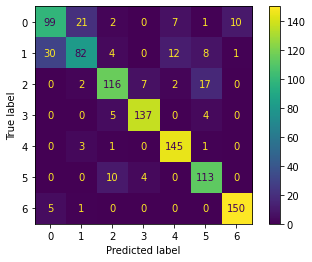

In [11]:
def Q1():
    
  knn = KNeighborsClassifier(n_neighbors=1)

  knn.fit(train_data, train_labels) #train on processed train data

  pred_knn  = knn.predict(dev_data) #predict on dev data

  accuracy_count_knn = 0

  for j in range(pred_knn.shape[0]):
    if pred_knn[j] == dev_labels[j]:
      accuracy_count_knn += 1
    else:
      continue

  print("KNN accuracy with no filtering: " + str (accuracy_count_knn/pred_knn.shape[0]))

  cm = confusion_matrix(dev_labels, pred_knn)

  ConfusionMatrixDisplay(cm).plot()

  pd.DataFrame(classification_report(dev_labels, pred_knn, output_dict=True))


### STUDENT END ###  
  
Q1()

## Bernoulli NB w/ Grid Search

In [12]:
def NB(alphas):

    # BernoulliNB training
    model_nb = BernoulliNB()
    model_nb.fit(train_data, train_labels)

    # use cros validation = 5 to validate the alphas
    model_cv = GridSearchCV(estimator=model_nb, param_grid=alphas, cv=5, scoring='accuracy')
    model_cv.fit(train_data, train_labels)

    # create the data frame
    params = [param['alpha'] for param in model_cv.cv_results_["params"]]
    mean_test_score = model_cv.cv_results_["mean_test_score"]
    std_test_score = model_cv.cv_results_["std_test_score"]
    df = pd.DataFrame(list(zip(params, mean_test_score,std_test_score)),
                   columns =['alpha', 'mean_test_score',"std_test_score"])
    print(df
         
)
    
alphas = {'alpha': [1.0e-10, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}

  
NB(alphas)

          alpha  mean_test_score  std_test_score
0  1.000000e-10         0.599167        0.013766
1  1.000000e-04         0.599167        0.013766
2  1.000000e-03         0.599167        0.013766
3  1.000000e-02         0.599167        0.013766
4  1.000000e-01         0.599083        0.013818
5  5.000000e-01         0.599250        0.013671
6  1.000000e+00         0.599083        0.013803
7  2.000000e+00         0.598750        0.014031
8  1.000000e+01         0.595083        0.011976


## Gaussian Naive Bayes

GaussianNB accuracy w/ no modification: 1.0
GaussianNB accuracy w/ var smoothing @ .1: 0.403
Bernoulli NB performance: 0.6


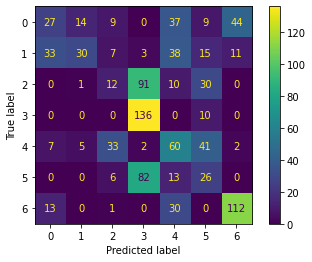

In [13]:
def GNB():

  
  ####Train on GaussianNB with no var_smoothing####
  model_gnb = GaussianNB()
  model_gnb.fit(train_data,train_labels)

  sigmas = model_gnb.sigma_
  thetas = model_gnb.theta_
   
  ## predict on dev data
  
  pred_gnb = model_gnb.predict(dev_data)
  accuracy_count_gnb = 0
  
  
  ###generate accuracy
  for j in range(dev_labels.shape[0]):
    if pred_gnb[j] == dev_labels[j]:
      accuracy_count_gnb += 1
    else:
      continue

  print("GaussianNB accuracy w/ no modification: " + str(accuracy_count_gnb/pred_gnb.shape[0]))

  ###Train on gaussianNB with var_smoothing = .1###

  model_gnb_s = GaussianNB(var_smoothing=.1)
  model_gnb_s.fit(train_data,train_labels)
  
  sigmas2 = model_gnb_s.sigma_
  thetas2 = model_gnb_s.theta_
  
 
  ## predict on dev data

  pred_gnb_s = model_gnb_s.predict(dev_data)
  accuracy_count_gnb_s = 0
  
  
  ###generate accuracy
  for j in range(dev_labels.shape[0]):
    if pred_gnb_s[j] == dev_labels[j]:
      accuracy_count_gnb_s += 1
    else:
      continue

  print("GaussianNB accuracy w/ var smoothing @ .1: " + str(accuracy_count_gnb_s/pred_gnb_s.shape[0]))
  
  #train on bernoulliNB

  model_gnb_s2 = BernoulliNB()
  model_gnb_s2.fit(train_data,train_labels)

  pred_gnb_s2 = model_gnb_s2.predict(dev_data)
  accuracy_count_gnb_s2 = 0

  for j in range(dev_labels.shape[0]):
    if pred_gnb_s2[j] == dev_labels[j]:
      accuracy_count_gnb_s2 += 1
    else:
      continue

  print("Bernoulli NB performance: " + str(accuracy_count_gnb_s2/pred_gnb_s2.shape[0]))

  cm = confusion_matrix(dev_labels, pred_gnb_s)

  ConfusionMatrixDisplay(cm).plot()

  pd.DataFrame(classification_report(dev_labels, pred_gnb_s, output_dict=True))

### STUDENT END ###
    
GNB()

In [14]:
# Save Y to an array
train_dev_Y = np.array(np.array(train["Cover_Type"].tolist()))

# Binarize Y
def binarizeY(data):
    binarized_data = np.zeros((data.size,10))
    for j in range(0,data.size):
        feature = data[j:j+1]
        i = feature.astype(np.int64) 
        binarized_data[j,i]=1
    return binarized_data

train_dev_Y_bi = binarizeY(train_dev_Y)

In [15]:
# Pull out the features to normalize
X_norm_feat_list = [
    'Elevation',
    'Aspect',
    'Slope',
    'Horizontal_Distance_To_Hydrology',
    'Vertical_Distance_To_Hydrology',
    'Horizontal_Distance_To_Roadways',
    'Hillshade_9am',
    'Hillshade_Noon',
    'Hillshade_3pm',
    'Horizontal_Distance_To_Fire_Points'
]

train_dev_X_norm = np.array(train[X_norm_feat_list])

print(train_dev_X_norm[0,:])

sc = preprocessing.StandardScaler()

train_dev_X_norm = sc.fit_transform(train_dev_X_norm)

print(train_dev_X_norm[0,:])

[2596   51    3  258    0  510  221  232  148 6279]
[-0.36709512 -0.95997982 -1.59713163  0.14663941 -0.83407423 -0.90868131
  0.27145373  0.57165346  0.28125888  4.33480516]


In [16]:
# Pull out the wilderness area features
X_wild_feat_list = [
    'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4'
]

train_dev_X_wild = sc.fit_transform(np.array(train[X_wild_feat_list]))

In [17]:
# Pull out the soil area features
X_soil_feat_list = [
    'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
    'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
    'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
    'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
    'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40'
]

train_dev_X_soil = sc.fit_transform(np.array(train[X_soil_feat_list]))

In [18]:
# Soil PCA section
n_comp = 1

X_soil_feat_list = ['pca_'+str(i+1) for i in range(n_comp)]
pca_mod = PCA(n_components = n_comp)
train_dev_X_soil = pca_mod.fit_transform(train_dev_X_soil)

In [19]:
# Choose features 
feature_list = X_norm_feat_list + X_wild_feat_list + X_soil_feat_list
print(feature_list)
# Stich together the normalized and binarized features
train_dev_X = np.concatenate((train_dev_X_norm, train_dev_X_wild, train_dev_X_soil), axis=1)
print(train_dev_X[0,:])

['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4', 'pca_1']
[-0.36709512 -0.95997982 -1.59713163  0.14663941 -0.83407423 -0.90868131
  0.27145373  0.57165346  0.28125888  4.33480516  1.78983321 -0.18474034
 -0.85080123 -0.66901612  0.20703874]


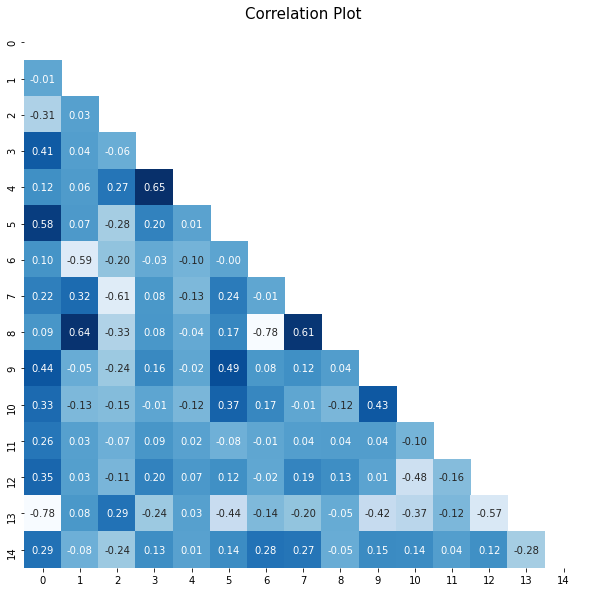

In [20]:
# correlation plot
corr = pd.DataFrame(train_dev_X).corr()

# make mask (only plot lower left triangle)
mask = np.ones_like(corr,dtype = np.bool)
mask = np.triu(mask)

# plot the heatmap
fig, ax = plt.subplots(figsize=(10,10))         
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        mask = mask,
        annot=True, 
        fmt='.2f',
        cmap="Blues",
        cbar=False)

plt.title('Correlation Plot',size=15)
plt.show()
pass

In [21]:
shuffle = np.random.permutation(np.arange(train_dev_X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
new_test_data, new_test_labels = X[13000:], Y[13000:]
new_dev_data, new_dev_labels = X[12000:13000], Y[12000:13000]
new_train_data, new_train_labels = X[:12000], Y[:12000]
new_train_df = train.iloc[shuffle,:].iloc[:12000 , :]

data shape:  (15120, 55)
label shape: (15120,)


KNN accuracy with no filtering: 0.85


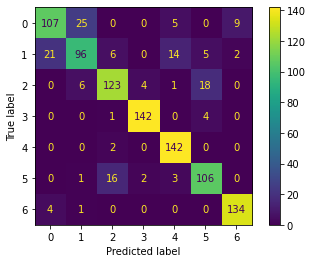

In [22]:
def Q1():
    
  knn = KNeighborsClassifier(n_neighbors=1)

  knn.fit(new_train_data, new_train_labels) #train on processed train data

  pred_knn  = knn.predict(new_dev_data) #predict on dev data

  accuracy_count_knn = 0

  for j in range(pred_knn.shape[0]):
    if pred_knn[j] == new_dev_labels[j]:
      accuracy_count_knn += 1
    else:
      continue

  print("KNN accuracy with no filtering: " + str (accuracy_count_knn/pred_knn.shape[0]))

  cm = confusion_matrix(new_dev_labels, pred_knn)

  ConfusionMatrixDisplay(cm).plot()

  pd.DataFrame(classification_report(new_dev_labels, pred_knn, output_dict=True))


### STUDENT END ###  
  
Q1()

GaussianNB accuracy w/ no modification: 1.0
GaussianNB accuracy w/ var smoothing @ .1: 0.41
Bernoulli NB performance: 0.605


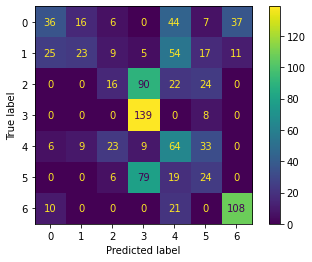

In [23]:
def GNB():

  
  ####Train on GaussianNB with no var_smoothing####
  model_gnb = GaussianNB()
  model_gnb.fit(new_train_data,new_train_labels)

  sigmas = model_gnb.sigma_
  thetas = model_gnb.theta_
   
  ## predict on dev data
  
  pred_gnb = model_gnb.predict(new_dev_data)
  accuracy_count_gnb = 0
  
  
  ###generate accuracy
  for j in range(new_dev_labels.shape[0]):
    if pred_gnb[j] == new_dev_labels[j]:
      accuracy_count_gnb += 1
    else:
      continue

  print("GaussianNB accuracy w/ no modification: " + str(accuracy_count_gnb/pred_gnb.shape[0]))

  ###Train on gaussianNB with var_smoothing = .1###

  model_gnb_s = GaussianNB(var_smoothing=.1)
  model_gnb_s.fit(new_train_data,new_train_labels)
  
  sigmas2 = model_gnb_s.sigma_
  thetas2 = model_gnb_s.theta_
  
 
  ## predict on dev data

  pred_gnb_s = model_gnb_s.predict(new_dev_data)
  accuracy_count_gnb_s = 0
  
  
  ###generate accuracy
  for j in range(new_dev_labels.shape[0]):
    if pred_gnb_s[j] == new_dev_labels[j]:
      accuracy_count_gnb_s += 1
    else:
      continue

  print("GaussianNB accuracy w/ var smoothing @ .1: " + str(accuracy_count_gnb_s/pred_gnb_s.shape[0]))
  
  #train on bernoulliNB

  model_gnb_s2 = BernoulliNB()
  model_gnb_s2.fit(new_train_data,new_train_labels)

  pred_gnb_s2 = model_gnb_s2.predict(new_dev_data)
  accuracy_count_gnb_s2 = 0

  for j in range(new_dev_labels.shape[0]):
    if pred_gnb_s2[j] == new_dev_labels[j]:
      accuracy_count_gnb_s2 += 1
    else:
      continue

  print("Bernoulli NB performance: " + str(accuracy_count_gnb_s2/pred_gnb_s2.shape[0]))

  cm = confusion_matrix(new_dev_labels, pred_gnb_s)

  ConfusionMatrixDisplay(cm).plot()

  pd.DataFrame(classification_report(new_dev_labels, pred_gnb_s, output_dict=True))

### STUDENT END ###
    
GNB()

In [24]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y = ohe.fit_transform(new_train_data).toarray()